# Activity: Explore confidence intervals

## Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above. <br>

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports

### Import packages

Import `pandas` and `numpy`.

In [1]:
# Import relevant packages

### YOUR CODE HERE ###
import pandas as pd
import numpy as np

### Load the dataset

The dataset provided gives national Air Quality Index (AQI) measurements by state over time.  `Pandas` is used to import the file `c4_epa_air_quality.csv` as a DataFrame named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

*Note: For the purposes of your analysis, you can assume this data is randomly sampled from a larger population.*

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA

### YOUR CODE HERE ###
aqi = pd.read_csv('c4_epa_air_quality.csv')

## Step 2: Data exploration

### Explore your dataset

Before proceeding to your deliverables, spend some time exploring the `aqi` DataFrame. 

In [15]:
# Explore your DataFrame `aqi`.

### YOUR CODE HERE ###
aqi.head()

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


In [5]:
aqi.aqi.describe()

count    260.000000
mean       6.757692
std        7.061707
min        0.000000
25%        2.000000
50%        5.000000
75%        9.000000
max       50.000000
Name: aqi, dtype: float64

In [17]:
aqi.state_name.describe()

count            260
unique            52
top       California
freq              66
Name: state_name, dtype: object

In [9]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        260 non-null    int64         
 1   date_local        260 non-null    datetime64[ns]
 2   state_name        260 non-null    object        
 3   county_name       260 non-null    object        
 4   city_name         260 non-null    object        
 5   local_site_name   257 non-null    object        
 6   parameter_name    260 non-null    object        
 7   units_of_measure  260 non-null    object        
 8   arithmetic_mean   260 non-null    float64       
 9   aqi               260 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 20.4+ KB


In [12]:
aqi['date_local'] = pd.to_datetime(aqi['date_local'])
print("Min date:",min(aqi['date_local']))
print("Max date:",max(aqi['date_local']))

Min date: 2018-01-01 00:00:00
Max date: 2018-01-01 00:00:00


**Question:** What time range does this data cover?

It appears the time range is 0, all the data points have the same date.


**Question:** What are the minimum and maximum AQI values observed in the dataset?

The min aqi is 0, and the max aqi is 50.

**Question:** Are all states equally represented in the dataset?

It appears California has the most ammount of data point collected with a total frequncy of 66.

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about descriptive statisics](https://www.coursera.org/learn/the-power-of-statistics/lecture/jVRS4/measures-of-central-tendency).
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use `pandas` or `numpy` to explore the `aqi` DataFrame.
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use any of the following functions:
- `pandas`: `describe()`,`value_counts()`,`shape()`
- `numpy`: `unique()`,`mean()`
    
</details>

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates.

In [24]:
# Summarize the mean AQI for RRE states.

### YOUR CODE HERE ###

# Create a list of RRE states.
RRE_states = ['California', 'Florida', 'Michigan', 'Ohio', 'Pennsylvania', 'Texas']

# Subset `aqi` to only consider these states.
mask = aqi['state_name'].isin(RRE_states)
RRE_df = aqi[mask]

# Find the mean aqi for each of the RRE states.
print("Mean aqi:",RRE_df.aqi.mean())

Mean aqi: 8.697478991596638


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Subset your DataFrame to only include those states in which RRE operates. 
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Define a list consisting of the states in which RRE operates and use that list to subset your DataFrame. 
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `pandas` `isin.()` to subset your DataFrame by the list of RRE states.
    
</details>

### Construct a boxplot visualization for the AQI of these states

Seaborn is a simple visualization library, commonly imported as `sns`. Import `seaborn`. Then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

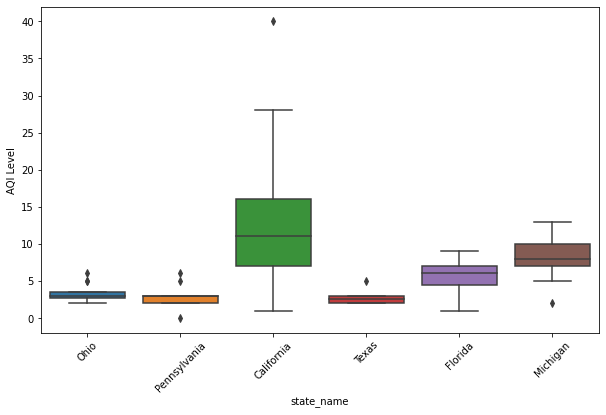

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

### YOUR CODE HERE ###
fig = plt.figure(figsize=(10,6))
box = sns.boxplot(data=RRE_df,x='state_name',y='aqi',showfliers='False')
plt.xticks(rotation=45)
plt.ylabel("AQI Level")
plt.show()

In [47]:
RRE_df = RRE_df.reset_index()
RRE_df

,index,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
1,3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
2,7,7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
3,12,12,2018-01-01,Ohio,Hamilton,Cincinnati,Taft NCore,Carbon monoxide,Parts per million,0.252632,3
4,16,16,2018-01-01,California,San Bernardino,Ontario,Ontario Near Road (Etiwanda),Carbon monoxide,Parts per million,0.747368,11
...,...,...,...,...,...,...,...,...,...,...,...
114,247,247,2018-01-01,Texas,Dallas,Dallas,Dallas Hinton,Carbon monoxide,Parts per million,0.157895,2
115,248,248,2018-01-01,Michigan,Wayne,Detroit,NORTHWEST,Carbon monoxide,Parts per million,0.415789,8
116,249,249,2018-01-01,California,Orange,Anaheim,Anaheim Near-Road,Carbon monoxide,Parts per million,1.015789,15
117,250,250,2018-01-01,California,Los Angeles,West Los Angeles,West Los Angeles,Carbon monoxide,Parts per million,0.655556,11


### Create an in-line visualization showing the distribution of `aqi` by `state_name`

Now, create an in-line visualization showing the distribution of `aqi` by `state_name`.

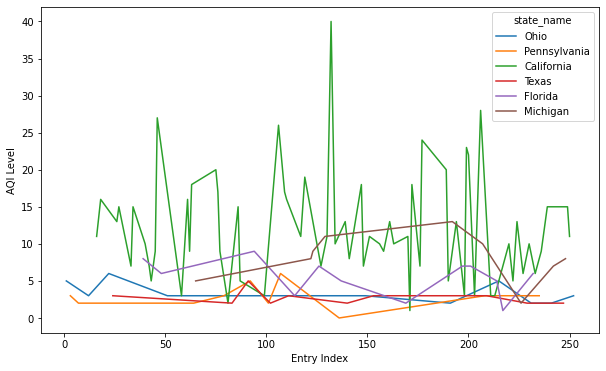

In [53]:
### YOUR CODE HERE ###
fig = plt.figure(figsize=(10,6))
sns.lineplot(data=RRE_df,x='index',y='aqi',hue='state_name')
plt.ylabel("AQI Level")
plt.xlabel("Entry Index")
plt.show()

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the boxplot visual for this purpose.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Reference [Seaborn's boxplot visualization documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). 
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Assign `state_name` to the x argument and `aqi` to the y.
    
</details>

**Question:** Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

California is a state that would be affected by this policy

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Consider the mean AQI for the RRE states, as well as the distribution in the boxplots relative to the policy limit (10).
    
</details>

### Construct a confidence interval for the RRE state with the highest mean AQI

Recall the 4-step process in constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### Construct your sample statistic

To contruct your sample statistic, find the mean AQI for your state.

In [ ]:
# Find the mean aqi for your state.

### YOUR CODE HERE ###

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Reference what you've previously learned to recall what a [sample statistic](https://www.coursera.org/learn/the-power-of-statistics/supplement/cdOx7/construct-a-confidence-interval-for-a-small-sample-size) is.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Calculate the mean for your highest AQI state to arrive at your sample statistic.
    
</details>

<details>
 <summary><h4><strong>Hint 3</strong></h4></summary>

Call the `mean()` function within `pandas` on your DataFrame.
    
</details>

### Choose your confidence level

Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of confidence about your result.

In [64]:
# Input your confidence level here:

### YOUR CODE HERE ###
cl = 0.95

### Find your margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [65]:
# Calculate your margin of error.

### YOUR CODE HERE ###

# Begin by identifying the z associated with your chosen confidence level.
zscore = 1.96

# Next, calculate your standard error.
serr = RRE_df.aqi.std()/np.sqrt(RRE_df.shape[0])

# Lastly, use the preceding result to calculate your margin of error.
merr = zscore*serr


### Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [68]:
# Calculate your confidence interval (upper and lower limits).

### YOUR CODE HERE ###
upper_limit = RRE_df.aqi.mean() + merr
lower_limit = RRE_df.aqi.mean() - merr

print("Lower limit:",lower_limit)
print("Upper limit:",upper_limit)

Lower limit: 7.4589359725454365
Upper limit: 9.93602201064784


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about constructing a confidence interval](https://www.coursera.org/learn/the-power-of-statistics/lecture/3jbsX/construct-a-confidence-interval-for-a-proportion).
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Identify the sample mean from your prior work. Then use the margin of error to construct your upper and lower limits.  
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Subtract the margin of error from the sample mean to construct your lower limit, and add the margin of error to your sample mean to construct your upper limit.
    
</details>

### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

In [69]:
# Import stats from scipy.
from scipy import stats

### YOUR CODE HERE ###
for state in RRE_states:
    df = aqi[aqi['state_name'] == state]
    mean = df.aqi.mean()
    se = df.aqi.std()/np.sqrt(df.shape[0])
    inter = stats.norm.interval(alpha=0.95,loc=mean,scale=se)
    print("95% confidence interval for", state,":",inter)

95% confidence interval for California : (10.359751399400034, 13.882672843024208)
95% confidence interval for Florida : (4.124635521185665, 6.875364478814335)
95% confidence interval for Michigan : (5.982936453096428, 10.239285769125793)
95% confidence interval for Ohio : (2.5962874725443053, 4.070379194122362)
95% confidence interval for Pennsylvania : (1.8690763330591793, 3.9309236669408207)
95% confidence interval for Texas : (2.112010804637984, 3.2879891953620164)


## Step 4: Results and evaluation

### Recalculate your confidence interval

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate your confidence interval.

In [71]:
### YOUR CODE HERE ###
for state in RRE_states:
    df = aqi[aqi['state_name'] == state]
    mean = df.aqi.mean()
    se = df.aqi.std()/np.sqrt(df.shape[0])
    inter = stats.norm.interval(alpha=0.99,loc=mean,scale=se)
    print("99% confidence interval for", state,":",inter)

99% confidence interval for California : (9.806260326136803, 14.43616391628744)
99% confidence interval for Florida : (3.6924646802009504, 7.307535319799049)
99% confidence interval for Michigan : (5.314215509750966, 10.908006712471256)
99% confidence interval for Ohio : (2.364690878035704, 4.301975788630963)
99% confidence interval for Pennsylvania : (1.5451366392574726, 4.254863360742528)
99% confidence interval for Texas : (1.92725120893533, 3.4727487910646704)


# Considerations

**What are some key takeaways that you learned from this lab?**

Confidence intervals are good way to measure the uncertainty on populations

**What findings would you share with others?**

California has the highest srpead followed up by Michigan

**What would you convey to external stakeholders?**

Try to collect more data on other states that are not California

**References**

[seaborn.boxplot — seaborn 0.12.1 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). (n.d.). 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.